<h1>Chapter 4 Analysis</h1>
<p>This is my final attempt at Chapter 4. May God have mercy on my soul.</p>
<p>  ~ Gregory Antell, Boston, MA, December 2016</p>

<h1>Requirements</h1>

In [6]:
from __future__ import division
import pandas as pd
import numpy as np
import tat_neuro_functions as tnf
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1>Import Data</h1>
<p>This data has been preprocessed in a separate notebook. Missing variables were imputed using a "median" approach, which is designated by the "2" in "sklearn_preprocessed_df2". It contains all potential features, both clinical and genetic, prior to further feature engineering.</p>

In [7]:
DF = pd.read_csv('/Users/Greg/Documents/Drexel/ML/sklearn_preprocessed_df2.csv')
DF.head()

,Patient,Visit,Age,Gender,ART,VL,iVL,pVL,CD4,iCD4,...,101F,101P,101S,101T,101W,101Y,101V,log10_VL,log10_iVL,log10_pVL
0,A0001,R09,59.0,Male,on,20.0,987.0,987.0,797.0,400.0,...,0.0,0.000453,0.000356,0.000000,0.000129,0.0,0.001975,1.301030,2.994317,2.994317
1,A0010,R08,59.0,Male,on,20.0,50.0,470.0,1167.0,448.0,...,0.0,0.000000,0.004473,0.001278,0.000000,0.0,0.000000,1.301030,1.698970,2.672098
2,A0012,R02,63.0,Male,on,34.0,2083.0,28550.0,881.0,745.0,...,0.0,0.003399,0.000283,0.000850,0.000000,0.0,0.000142,1.531479,3.318689,4.455606
3,A0013,R09,68.0,Male,on,20.0,144.0,39373.0,771.0,564.0,...,0.0,0.000278,0.003894,0.000278,0.000000,0.0,0.000000,1.301030,2.158362,4.595199
4,A0015,R10,54.0,Male,on,20.0,79074.0,79074.0,561.0,309.0,...,0.0,0.003000,0.000500,0.000400,0.000000,0.0,0.000000,1.301030,4.898034,4.898034


<h2>Clinical Data Representation</h2>
<p>This dataframe only includes clinical data.</p>

In [8]:
clin_cols = ['GDS','Age','Gender','CD4','log10_VL','CD8','nCD4','log10_pVL','nCD8','TMHDS']
clin_df = tnf.select_dataframe_columns(DF, clin_cols)
clin_df.head()

,GDS,Age,Gender,CD4,log10_VL,CD8,nCD4,log10_pVL,nCD8,TMHDS
0,0.583333,59.0,Male,797.0,1.301030,1131.0,400.0,2.994317,1060.0,4.0
1,1.416667,59.0,Male,1167.0,1.301030,663.0,448.0,2.672098,478.0,4.0
2,0.583333,63.0,Male,881.0,1.531479,1599.0,403.0,4.455606,888.0,7.0
3,0.000000,68.0,Male,771.0,1.301030,958.0,553.0,4.595199,958.0,6.5
4,1.333333,54.0,Male,561.0,1.301030,1607.0,224.0,4.898034,1288.0,8.0


In [9]:
Fs = ['Age','Gender','CD4']
#def run_preparation_pipeline(clin_df,['Age'],['GDS'], 0.5):
target, feature_df = tnf.target_feature_split(clin_df, 'GDS', Fs)
feature_df = pd.get_dummies(feature_df, drop_first=True)
scaled_feature_df = tnf.scale_dataframe(feature_df)
target2 = tnf.threshold_target('GDS', 0.5)
X_df = scaled_feature_df
y = target2

np.ravel([int(i>=threshold) for i in target])

NameError: name 'threshold' is not defined

<h1>Exploratory Data Analysis</h1>
<p>A quick exploration of the target variable, the Global Deficity Score (GDS), as well as some clinical and genetic features of interest.</p>

In [ ]:
savepath = '/Users/Greg/Documents/Drexel/ML/finalstoryfigs/GDS_histogram.png'
tnf.plot_histogram(clin_df,'GDS','Global Deficit Score',savepath)

In [ ]:
def plot_clinical_boxplots(DF, impaired_df, nonimpaired_df, savepath):
    """creats boxplots of typical clinical parameters"""
    fig,ax = plt.subplots(2,3,figsize=(12,7))
    clin_cols = ['CD4','log10_VL','CD8','nCD4','log10_pVL','nCD8']
    plot_titles = ['CD4 count','Viral Load','CD8 count',
                   'Nadir CD4','Peak Viral Load','Nadir CD8']
    x,y,t = 0,0,0
    for feature in DF[clin_cols]:
        impaired_list = list(impaired_df[feature])
        nonimpaired_list = list(nonimpaired_df[feature])
        ax[x,y].tick_params(axis='x', labelsize=14)
        ax[x,y].tick_params(axis='y', labelsize=14, length=5)
        ax[x,y].yaxis.tick_left()
        ax[x,y].set_title(plot_titles[t], size=18)
        ax[x,y].set_xticklabels('')
        ax[x,y].boxplot([impaired_list, nonimpaired_list])
        # formatting
        ax[x,y].spines['left'].set_visible(True)
        ax[x,y].spines['left'].set_color('black')
        ax[x,y].spines['left'].set_linewidth(2)
        ax[x,y].spines['bottom'].set_visible(True)
        ax[x,y].spines['bottom'].set_color('black')
        ax[x,y].spines['bottom'].set_linewidth(2)
        ax[x,y].set_axis_bgcolor('white')
        t += 1
        if x<=1:
            ax[x,y].set_xticklabels(['GDS $\geq$ 0.5', 'GDS $<$ 0.5'], size=16)
        else:
            ax[x,y].set_xticklabels(['', '']) 
        #update x and y coordinates
        if y!=2:
            y+=1
        else:
            y=0
            x+=1
    ax[0,0].set_ylabel('cells/uL')
    ax[0,1].set_ylabel('Log10(copies/mL)')
    ax[0,2].set_ylabel('cells/uL')
    ax[1,0].set_ylabel('cells/uL')
    ax[1,1].set_ylabel('Log10(copies/mL)')
    ax[1,2].set_ylabel('cells/uL')
    #plt.show()
    fig.tight_layout()
    fig.savefig(savepath, dpi=300)

In [ ]:
savepath = '/Users/Greg/Documents/Drexel/ML/finalstoryfigs/clinical_boxplots.png'
impaired_df, nonimpaired_df = tnf.split_df_by_impairment(clin_df, 0.5)
plot_clinical_boxplots(clin_df, impaired_df, nonimpaired_df, savepath)

In [ ]:
def get_covariate_matrix(DF, features, target, threshold, savepath):
    label_dict = {'CD4':'CD4 count', 'Age':'Age','log10_VL':'log10 VL',
    'Gender_Male':'Gender','nCD8':'nadir CD8','CD8':'CD8 count',
    'nCD4':'nadir CD4', 'log10_pVL':'log10 peak VL'}
    X, y = tnf.run_preparation_pipeline(DF, features, target, threshold)
    X.columns = [label_dict[c] for c in X.columns if c in list(label_dict.keys())]
    plt.figure(figsize=(6, 6))
    sns.set(font_scale=1.5)
    ax = sns.heatmap(X.corr(), square=True)
    ax.yaxis.set_label_position('right')
    ax.set_ylabel('Pearson Correlation Coefficient',fontsize=14, weight='bold', labelpad=80)
    #ax.ylabel('Pearson Correlation Coefficient')
    plt.tight_layout()
    plt.savefig(savepath, dpi=300)
    plt.show()

In [ ]:
target = 'GDS'
threshold = 0.5
features = ['Age','Gender','log10_VL','log10_pVL','CD4','nCD4','CD8','nCD8']
savepath = '/Users/Greg/Documents/Drexel/ML/finalstoryfigs/clinical_covar_matrix.png'
get_covariate_matrix(clin_df, features, target, threshold, savepath)

<h1>Clinical Models</h1>
<p>A number of different clinical models will be independently assessed and compared on the basis of accuracy, precision, recall, and other metrics.</p>

In [ ]:
# Compare logistic regression and random forest
# Use F1 and AUC 
# try different clinical models (known vs hypothesized metrics vs Hopkins Dementia Score) - check
# represent genetic data in different ways - check
# Permutation test by scrambling y relative to X - check
# look at feature importance in the best clinical models - check

In [ ]:
#target = 'GDS'
#threshold = 0.5
#features = ['Age','Gender','log10_VL','log10_pVL','CD4','nCD4','CD8','nCD8','TMHDS']
#X_df, y = tnf.run_preparation_pipeline(clin_df, features, target, threshold)
#print y.shape
#print X_df.shape
#X_df.head()

In [ ]:
# SURVEY MANY FEATURE COMBINATIONS
f1 = ['Age','Gender_Male','log10_VL','log10_pVL','CD4','nCD4','CD8','nCD8','TMHDS']
f2 = ['Age','Gender_Male','log10_VL','log10_pVL','CD4','nCD4','CD8','nCD8']
f3 = ['Age','Gender_Male']
f4 = ['log10_VL','log10_pVL','CD4','nCD4','CD8','nCD8']
f5 = ['log10_VL','log10_pVL','CD4','nCD4']
f6 = ['log10_pVL','nCD4']
f7 = ['log10_VL','CD4']
f8 = ['log10_VL']
f9 = ['CD4']
f10 = ['TMHDS']
feats = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10]

In [1]:
clin_df

NameError: name 'clin_df' is not defined

<h2>Script to compare model performance against benchmark</h2>

In [12]:
model_logit = LogisticRegression(penalty='l1',solver='liblinear',fit_intercept=True,
                                 class_weight='balanced',C=1)

# information for each model
AUC1, AUC2 = [], []
PREC1, PREC2 = [], []
REC1, REC2 = [], []
F1, F2 = [], []
TPR1, TPR2 = [], []
FPR1, FPR2 = [], []
COEF1, COEF2 = [], []

for f in feats:
    # information for each fold
    auc1, auc2 = [], []
    prec1, prec2 = [], []
    rec1, rec2 = [], []
    f1, f2 = [], []
    tpr1, tpr2 = [], []
    fpr1, fpr2 = [], []
    coef1, coef2 = [], []

    for _ in range(100):
        d = tnf.metrics_wrapper(clin_df, model_logit, f, 5)
        d_random = tnf.metrics_wrapper_random(clin_df, model_logit, f, 5)
        
        # append all cross validation metrics
        # true model
        auc1.append(np.mean(d['AUC']))
        prec1.append(np.mean(d['Precision']))
        rec1.append(np.mean(d['Recall']))
        f1.append(np.mean(d['F1']))
        tpr1.append(d['meanTPR'])
        fpr1.append(d['meanFPR'])
        coef1.append(d['Coef'])
        
        #randomize model
        auc2.append(np.mean(d_random['AUC']))
        prec2.append(np.mean(d_random['Precision']))
        rec2.append(np.mean(d_random['Recall']))
        f2.append(np.mean(d_random['F1']))
        tpr2.append(d_random['meanTPR'])
        fpr2.append(d_random['meanFPR'])
        coef2.append(d['Coef'])
    
    #append results for each model
    AUC1.append(auc1)
    AUC2.append(auc2)
    PREC1.append(prec1)
    PREC2.append(prec2)
    REC1.append(rec1)
    REC2.append(rec2)
    F1.append(f1)
    F2.append(f2)
    TPR1.append(tpr1) 
    TPR2.append(tpr2)
    FPR1.append(fpr1) 
    FPR2.append(fpr2)
    COEF1.append(coef1) 
    COEF2.append(coef2)

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<h1>ROC Curve Plots</h1>

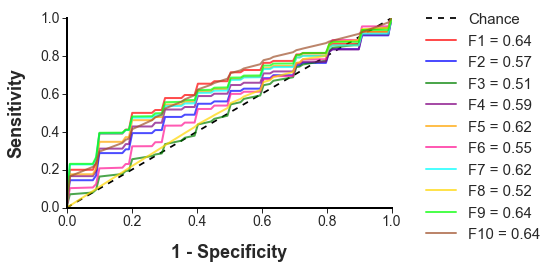

In [20]:
# iterate through the combinations of features

fig,ax=plt.subplots(figsize=(6,4))

# formatting
ax.tick_params(axis='x', labelsize=14, length=5)
ax.tick_params(axis='y', labelsize=14, length=5)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_xlabel('1 - Specificity', size=18, labelpad=15, weight='bold')
ax.set_ylabel('Sensitivity', size=18, labelpad=15, weight='bold')
ax.set_axis_bgcolor('white')
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.ticklabel_format(size=20)
ax.plot([0, 1], [0, 1], ls='--', color='black', label='Chance')
clrs = ['red','blue','green','purple','orange','deeppink','aqua','gold','lime','sienna']

for j in range(len(feats)):
    # returns a list of arrays
    f = FPR1[j]
    t = TPR1[j]
    a = str(round(np.mean(AUC1[j]),2))
    
    # initialize a mean TRP and FPR
    X = np.zeros(len(f[0]))
    Y = np.zeros(len(t[0]))
    # iterate through each randomization
    for i in range(len(t)):
        X = X + f[i]
        Y = Y + t[i]
    X = X/len(t)
    Y = Y/len(t)
    ax.plot(X, Y, color=clrs[j], ls='-', label='F'+str(j+1)+' = '+a, linewidth=2, alpha=0.7)

fig.tight_layout()
plt.legend(bbox_to_anchor=[1.5, 1.1],ncol=1)

savepath = '/Users/Greg/Documents/Drexel/ML/finalstoryfigs/clin_roc_plots.png'
fig.savefig(savepath,dpi=300, bbox_inches='tight')

# Compare to Random

In [33]:
from scipy import stats
# Some statistics
for i in range(len(AUC1)):
    a = AUC1[i]
    b = AUC2[i]
    print len(a), len(b)
    mw_stat, mw_p = stats.mannwhitneyu(a, b)
    t_stat, t_p = stats.ttest_ind(a,b)
    print mw_p
    print t_p
    


100 100
3.40357442844e-28
7.109479751e-40
100 100
1.20493214601e-13
6.89570048925e-16
100 100
0.265147530311
0.326911964387
100 100
9.17732774917e-23
6.30383099787e-27
100 100
6.99217824028e-25
5.77899419375e-31
100 100
1.2957185159e-07
2.37269795086e-08
100 100
3.2640872787e-29
3.59929603234e-42
100 100
0.00135949794184
0.000130895133744
100 100
4.55994850867e-33
6.48208421526e-52
100 100
6.15503815552e-34
1.95469872219e-50


In [15]:
aMean, bMean = [], []
aSTD, bSTD = [], []

for i in range(len(AUC1)):
    aMean.append(np.mean(AUC1[i]))
    aSTD.append(np.std(AUC1[i]))
    bMean.append(np.mean(AUC2[i]))
    bSTD.append(np.std(AUC2[i]))

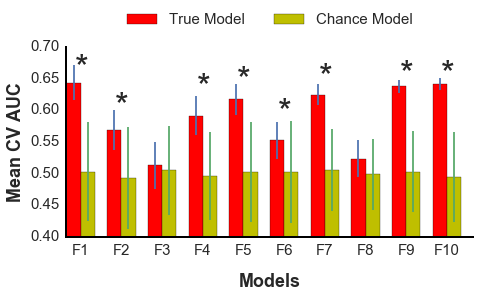

In [116]:
N = len(aMean)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(7,4))
rects1 = ax.bar(ind, aMean, width, color='r', yerr=aSTD)
rects2 = ax.bar(ind + width, bMean, width, color='y', yerr=bSTD)

# add some text for labels, title and axes ticks
ax.set_ylabel('Mean CV AUC', weight='bold', fontsize=18)
ax.set_xlabel('Models', labelpad=15, fontsize=18, weight='bold')
ax.set_xticks(ind + width)
labels = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']
ax.set_xticklabels(labels)
ax.set_ylim([0.4,0.7])

ax.legend((rects1[0], rects2[0]), ('True Model', 'Chance Model'),
          loc='upper center', bbox_to_anchor=(0.5, 1.25),ncol=2, fancybox=True)

# formatting colors and axes
ax.set_axis_bgcolor('white')
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)

ax.text(0.2,0.65,'*',fontsize=35)
ax.text(1.2,0.59,'*',fontsize=35)
ax.text(3.2,0.62,'*',fontsize=35)
ax.text(4.2,0.63,'*',fontsize=35)
ax.text(5.2,0.58,'*',fontsize=35)
ax.text(6.2,0.635,'*',fontsize=35)
ax.text(8.2,0.64,'*',fontsize=35)
ax.text(9.2,0.64,'*',fontsize=35)


fig.tight_layout()
savepath = '/Users/Greg/Documents/Drexel/ML/finalstoryfigs/clin_auc_barplots.png'
fig.savefig(savepath,dpi=300,bbox_inches='tight')

# Plot Coefficients Grid

In [17]:
coeff_dict_list = []

i=0
for feature_group in COEF1:
    #print len(feature_group)
    cv_mean_list = []
    for cv_group in feature_group:
        cv_mean = np.mean(cv_group,0)
        #print len(cv_group), cv_mean
        cv_mean_list.append(cv_mean)
    #print len(cv_mean_list), len(cv_mean_list[0][0])
    F = feats[i]
    S = np.mean(cv_mean_list,0)[0]
    Z = zip(F,S)
    coeff_dict_list.append(dict(Z))
    i+=1

X = []
VARS = ['TMHDS','Age','Gender_Male','nCD4','CD4','log10_pVL','log10_VL','nCD8','CD8']
for A in coeff_dict_list:
    x = []
    for V in VARS:
        if V in A.keys():
            x.append(A[V])
        else:
            x.append(np.nan)
    X.append(x)

coeff_df = pd.DataFrame(X)
coeff_df.columns = VARS
coeff_df.T

,0,1,2,3,4,5,6,7,8,9
TMHDS,-0.571915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.499653
Age,-0.285380,-0.157493,-0.176546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender_Male,0.011999,0.066611,-0.027101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nCD4,-0.269166,-0.276809,NaN,-0.290824,-0.275448,0.012415,NaN,NaN,NaN,NaN
CD4,0.702163,0.746187,NaN,0.741497,0.707960,NaN,0.534675,NaN,0.532213,NaN
log10_pVL,-0.170354,-0.230028,NaN,-0.241078,-0.260104,-0.259619,NaN,NaN,NaN,NaN
log10_VL,0.105204,0.079066,NaN,0.083389,0.069761,NaN,0.003128,-0.149899,NaN,NaN
nCD8,0.082743,0.084105,NaN,0.079731,NaN,NaN,NaN,NaN,NaN,NaN
CD8,-0.074165,-0.066934,NaN,-0.066631,NaN,NaN,NaN,NaN,NaN,NaN


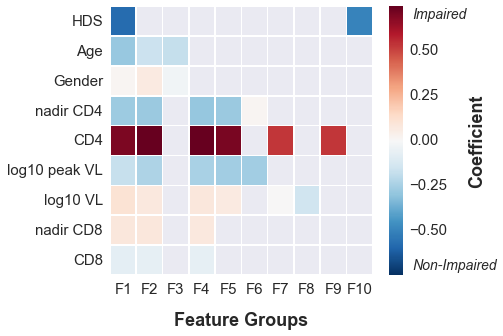

In [115]:
fig,ax = plt.subplots(figsize=(7,5))
ax = sns.heatmap(coeff_df.T, linewidths=.5)
VARS = ['CD8','nadir CD8','log10 VL','log10 peak VL','CD4','nadir CD4','Gender','Age','HDS']
ax.set_yticklabels(VARS)
ax.set_xticklabels(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10'])
ax.set_xlabel('Feature Groups', labelpad=15, fontsize=18, weight='bold')
ax.yaxis.set_label_position('right')
ax.set_ylabel('Coefficient', fontsize=18, weight='bold', labelpad=95)

ax.text(11.5,0.2,'Non-Impaired',fontsize=14,fontstyle='italic')
ax.text(11.5,8.6,'Impaired',fontsize=14,fontstyle='italic')
fig.tight_layout()
plt.show()

savepath = '/Users/Greg/Documents/Drexel/ML/finalstoryfigs/clin_roc_coeff.png'
fig.savefig(savepath,dpi=300, bbox_inches='tight')